In [1]:
import os
import pandas as pd

path = r"D:/Python Files/EDA/IPL Data"

os.chdir(path)

os.listdir(path)

ball = pd.read_excel("Ball_by_Ball.xlsx")

match = pd.read_excel("Match.xlsx")

player = pd.read_excel('Player.xlsx')

player_match = pd.read_excel('Player_Match.xlsx')

season = pd.read_excel('Season.xlsx')

team = pd.read_excel('Team.xlsx')

In [2]:
list(match)

['Match_Id',
 'Match_Date',
 'Team_Name_Id',
 'Opponent_Team_Id',
 'Season_Id',
 'Venue_Name',
 'Toss_Winner_Id',
 'Toss_Decision',
 'IS_Superover',
 'IS_Result',
 'Is_DuckWorthLewis',
 'Win_Type',
 'Won_By',
 'Match_Winner_Id',
 'Man_Of_The_Match_Id',
 'First_Umpire_Id',
 'Second_Umpire_Id',
 'City_Name',
 'Host_Country']

In [8]:
# no of matches won by each team in ipl history

win_match = match[['Match_Winner_Id','Match_Id']]
win_match = win_match.groupby(['Match_Winner_Id'])['Match_Id'].count().reset_index()
win_match

,Match_Winner_Id,Match_Id
0,1.0,68
1,2.0,70
2,3.0,79
3,4.0,63
4,5.0,63
5,6.0,56
6,7.0,80
7,8.0,29
8,9.0,6
9,10.0,12


In [10]:
list(team)

['Team_Id', 'Team_Name', 'Team_Short_Code']

In [69]:
df1 = pd.merge(win_match, team, left_on = 'Match_Winner_Id', right_on = 'Team_Id')
df1 = df1[['Team_Id','Team_Name','Team_Short_Code','Match_Id']]
df1 = df1.rename(columns = {'Match_Id':'Win_Count'})
df1

,Team_Id,Team_Name,Team_Short_Code,Win_Count
0,1,Kolkata Knight Riders,KKR,68
1,2,Royal Challengers Bangalore,RCB,70
2,3,Chennai Super Kings,CSK,79
3,4,Kings XI Punjab,KXIP,63
4,5,Rajasthan Royals,RR,63
5,6,Delhi Daredevils,DD,56
6,7,Mumbai Indians,MI,80
7,8,Deccan Chargers,DC,29
8,9,Kochi Tuskers Kerala,KTK,6
9,10,Pune Warriors,PW,12


In [23]:
#method 2
win_match1 = match['Match_Winner_Id'].value_counts()
win_match1 = pd.DataFrame(win_match1)
win_match1.sort_values(by = 'Match_Winner_Id', ascending = False)


,Match_Winner_Id
7.0,80
3.0,79
2.0,70
1.0,68
4.0,63
5.0,63
6.0,56
11.0,34
8.0,29
10.0,12


In [28]:
# method 3 using crosstab by default returns count
won_match = pd.crosstab(index = match['Match_Winner_Id'], columns = 'Win_count').reset_index()
won_match

col_0,Match_Winner_Id,Win_count
0,1.0,68
1,2.0,70
2,3.0,79
3,4.0,63
4,5.0,63
5,6.0,56
6,7.0,80
7,8.0,29
8,9.0,6
9,10.0,12


In [47]:
# Percentage of wins for each team

total_match_home = pd.DataFrame(match['Team_Name_Id'].value_counts())
total_match_home.index.name = 'Team_Id'
total_match_home

,Team_Name_Id
Team_Id,
2,78
3,74
6,69
4,65
7,62
1,62
5,52
8,39
11,30


In [46]:
total_match_away = pd.DataFrame(match['Opponent_Team_Id'].value_counts())
total_match_away.index.name = 'Team_Id'
total_match_away

,Opponent_Team_Id
Team_Id,
7,78
1,70
4,69
5,66
6,64
2,61
3,57
8,36
11,32


In [65]:
total_match = pd.merge(total_match_home, total_match_away, left_on = 'Team_Id', right_on = 'Team_Id')
total_match['total'] = total_match['Team_Name_Id'] + total_match['Opponent_Team_Id']
total_match = pd.DataFrame(total_match['total'])
total_match

,total
Team_Id,
2,139
3,131
6,133
4,134
7,140
1,132
5,118
8,75
11,62


In [72]:
# final table
final_table = pd.merge(df1, total_match, left_on = 'Team_Id', right_on = 'Team_Id')
final_table

,Team_Id,Team_Name,Team_Short_Code,Win_Count,total
0,1,Kolkata Knight Riders,KKR,68,132
1,2,Royal Challengers Bangalore,RCB,70,139
2,3,Chennai Super Kings,CSK,79,131
3,4,Kings XI Punjab,KXIP,63,134
4,5,Rajasthan Royals,RR,63,118
5,6,Delhi Daredevils,DD,56,133
6,7,Mumbai Indians,MI,80,140
7,8,Deccan Chargers,DC,29,75
8,9,Kochi Tuskers Kerala,KTK,6,14
9,10,Pune Warriors,PW,12,46


In [74]:
final_table['win_pctg'] = round(final_table['Win_Count']/final_table['total'] * 100,2)
final_table.sort_values(by = 'win_pctg', ascending = False)

,Team_Id,Team_Name,Team_Short_Code,Win_Count,total,win_pctg
2,3,Chennai Super Kings,CSK,79,131,60.31
6,7,Mumbai Indians,MI,80,140,57.14
12,13,Gujarat Lions,GL,9,16,56.25
10,11,Sunrisers Hyderabad,SRH,34,62,54.84
4,5,Rajasthan Royals,RR,63,118,53.39
0,1,Kolkata Knight Riders,KKR,68,132,51.52
1,2,Royal Challengers Bangalore,RCB,70,139,50.36
3,4,Kings XI Punjab,KXIP,63,134,47.01
8,9,Kochi Tuskers Kerala,KTK,6,14,42.86
5,6,Delhi Daredevils,DD,56,133,42.11


In [82]:
# Two way cross table

# No. of matches won by each team while batting first and chasing

Team_wise_win_type = pd.crosstab(index=match['Match_Winner_Id'], columns=match['Win_Type']).reset_index()
Team_wise_win_type = pd.merge(Team_wise_win_type, team[['Team_Id', 'Team_Short_Code']], 
                              left_on="Match_Winner_Id", right_on="Team_Id")
Team_wise_win_type = Team_wise_win_type[['Team_Short_Code', 'by runs', 'by wickets', 'Tie']]
Team_wise_win_type = Team_wise_win_type.rename(columns= { 
    "Team_Short_Code" :" Team", "by runs" : "Batting First", "by wickets" : "Chasing", 
    "Tie" : "Match Tied"
})

Team_wise_win_type
Team_wise_win_type


,Team,Batting First,Chasing,Match Tied
0,KKR,29,39,0
1,RCB,27,42,1
2,CSK,46,33,0
3,KXIP,28,33,2
4,RR,23,38,2
5,DD,18,38,0
6,MI,43,37,0
7,DC,18,11,0
8,KTK,2,4,0
9,PW,6,6,0


## DAY2

In [95]:
# Creating two way cross table using groupby function

data = match.groupby(['Match_Winner_Id','Win_Type']).size().reset_index()

# Tranforming the long data to wide data

data = data.pivot(index = 'Match_Winner_Id', columns = 'Win_Type', values = 0)

# Filling the missing values by 0

data['Tie'] = data['Tie'].fillna(0)

# count the total
data['total'] = data['Tie']+data['by runs']+data['by wickets']
data

Win_Type,Tie,by runs,by wickets,total
Match_Winner_Id,,,,
1.0,0.0,29.0,39.0,68.0
2.0,1.0,27.0,42.0,70.0
3.0,0.0,46.0,33.0,79.0
4.0,2.0,28.0,33.0,63.0
5.0,2.0,23.0,38.0,63.0
6.0,0.0,18.0,38.0,56.0
7.0,0.0,43.0,37.0,80.0
8.0,0.0,18.0,11.0,29.0
9.0,0.0,2.0,4.0,6.0


In [96]:
# Lets create a cross table between type of win by each team in each season

data = pd.crosstab(index = [match['Match_Winner_Id'], match['Season_Id']], columns= match['Win_Type'], margins=True)

data

Win_Type                   Tie  by runs  by wickets  All
Match_Winner_Id Season_Id                               
1.0             1            0        4           2    6
                2            0        1           2    3
                3            0        4           3    7
                4            0        4           4    8
                5            0        6           6   12
                6            0        2           4    6
                7            0        4           7   11
                8            0        2           5    7
                9            0        2           6    8
2.0             1            0        2           2    4
                2            0        3           6    9
                3            0        1           7    8
                4            0        3           7   10
                5            0        4           4    8
                6            1        5           3    9
                7            0        1           4    5
                8            0        3           5    8
                9            0        5           4    9
3.0             1            0        5           4    9
                2            0        6           2    8
                3            0        5           4    9
                4            0        8           3   11
                5            0        5           5   10
                6            0        7           5   12
                7            0        3           7   10
                8            0        7           3   10
4.0             1            0        5           5   10
                2            0        3           4    7
                3            1        0           3    4
                4            0        4           3    7
...                        ...      ...         ...  ...
6.0             5            0        2           9   11
                6            0        1           2    3
                7            0        0           2    2
                8            0        2           3    5
                9            0        2           5    7
7.0             1            0        2           5    7
                2            0        4           1    5
                3            0        8           3   11
                4            0        5           5   10
                5            0        3           7   10
                6            0        9           4   13
                7            0        3           4    7
                8            0        7           3   10
                9            0        2           5    7
8.0             1            0        0           2    2
                2            0        5           4    9
                3            0        5           3    8
                4            0        5           1    6
                5            0        3           1    4
9.0             4            0        2           4    6
10.0            4            0        0           4    4
                5            0        3           1    4
                6            0        3           1    4
11.0            6            1        4           5   10
                7            0        3           3    6
                8            0        6           1    7
                9            0        5           6   11
12.0            9            0        2           3    5
13.0            9            0        1           8    9
All                          6      261         307  574

[77 rows x 4 columns]

In [103]:
#PS 2: Create a table containing team name scoring maximum runs - season wise
db = ball.groupby(['Season_Id','Team_Batting_Id'])['Batsman_Scored'].sum().reset_index()
db['Rank'] = db.groupby(['Season_Id'])['Batsman_Scored'].rank(ascending = False)
db = db[(db['Rank']==1)]
db

,Season_Id,Team_Batting_Id,Batsman_Scored,Rank
4,1,5,2420,1.0
15,2,8,2283,1.0
22,3,7,2661,1.0
26,4,3,2461,1.0
36,5,3,2716,1.0
49,6,7,2841,1.0
55,7,4,2824,1.0
66,8,7,2611,1.0
69,9,2,2859,1.0


In [104]:
# Lets change the data type of column 

cols = [col for col in ball.columns if col not in ['Batsman_Scored', 'Extra_Runs']]

ball[cols] = ball[cols].apply(lambda x: x.astype('category'))

ball.dtypes

Match_Id                    category
Season_Id                   category
Innings_Id                  category
Over_Id                     category
Ball_Id                     category
Team_Batting_Id             category
Team_Bowling_Id             category
Striker_Id                  category
Striker_Batting_Position    category
Non_Striker_Id              category
Bowler_Id                   category
Batsman_Scored                 int64
Extra_Type                  category
Extra_Runs                    object
Player_dissimal_Id          category
Dissimal_Type               category
Fielder_Id                  category
dtype: object

In [110]:
# Univariate Analysis - PS 1: Is team batting first scoring more runs or team chasing scoring more runs?

bfs = ball.groupby(['Innings_Id'])['Batsman_Scored'].sum().reset_index().sort_values(by = 'Batsman_Scored', ascending = False)
bfs

,Innings_Id,Batsman_Scored
0,1,86811
1,2,78989
2,3,80
3,4,70


In [111]:
# Actually Inning ID 3 and 4 refer to innings 1st or 2nd in super over match. This we can club them with 1 and 2 respt.

First_Inning_runs = bfs[(bfs['Innings_Id'] == 1) | (bfs['Innings_Id'] == 3)]['Batsman_Scored'].sum()

First_Inning_runs

Second_Inning_runs = bfs[(bfs['Innings_Id'] == 2) | (bfs['Innings_Id'] == 4)]['Batsman_Scored'].sum()

Second_Inning_runs


79059

In [112]:
Final_Data = pd.DataFrame()

Inning = ['First Inning', 'Second Inning']

Runs = [First_Inning_runs, Second_Inning_runs]

Final_Data['Inning'] = Inning

Final_Data['Runs'] = Runs

Final_Data


,Inning,Runs
0,First Inning,86891
1,Second Inning,79059


Text(0.5, 1.0, 'Inning wise runs in IPL')

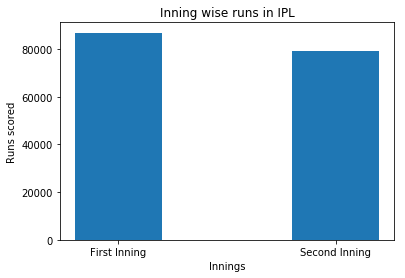

In [114]:
# Lets Plot this in form of a bar chart

from matplotlib import pyplot as plt

plt.bar(Final_Data['Inning'], Final_Data['Runs'], width= .4)

plt.xlabel('Innings')

plt.ylabel('Runs scored')

plt.title('Inning wise runs in IPL')
